<a href="https://colab.research.google.com/github/shaina-12/Knee-Ostheoarthritis-Detection-and-Severity-Prediction/blob/main/Experiment%201/Knee_Osteoarthritis_Detection_and_Severity_Prediction_1st_Experiment_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cv2 as cv
import os
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
train_path = "/content/drive/My Drive/train/"
test_path = "/content/drive/My Drive/test/"

## Lets Collect The Training Data

In [5]:
grades = ['grade_0','grade_1','grade_2','grade_3','grade_4']
finalListTrain = []
finalTrainLabels = []
for i in range(len(grades)):
    dir_join = train_path+grades[i]
    for file in os.listdir(dir_join):
        finalListTrain.append(dir_join+'/'+file)
        finalTrainLabels.append(i)
#dir_join = train_path+grades[0]  
#l = os.listdir(os.path.join(dir_join))
#l

## Similarly, we can collect the test data

In [6]:
finalListTest = []
finalTestLabels = []
for i in range(len(grades)):
    dir_join = test_path+grades[i]
    for file in os.listdir(dir_join):
        finalListTest.append(dir_join+'/'+file)
        finalTestLabels.append(i)

## Lets create pandas dataframe for both training and test data

In [7]:
train_dat = {'path':finalListTrain,'label':finalTrainLabels}
test_dat = {'path':finalListTest,'label':finalTestLabels}

In [8]:
train_data = pd.DataFrame.from_dict(train_dat)
train_data.head()

,path,label
0,/content/drive/My Drive/train/grade_0/9512848R...,0
1,/content/drive/My Drive/train/grade_0/9465265L...,0
2,/content/drive/My Drive/train/grade_0/9679243L...,0
3,/content/drive/My Drive/train/grade_0/9302341L...,0
4,/content/drive/My Drive/train/grade_0/9023407L...,0


In [9]:
test_data = pd.DataFrame.from_dict(test_dat)
test_data.head()

,path,label
0,/content/drive/My Drive/test/grade_0/9807132L.png,0
1,/content/drive/My Drive/test/grade_0/9588277L.png,0
2,/content/drive/My Drive/test/grade_0/9074232L.png,0
3,/content/drive/My Drive/test/grade_0/9952817R.png,0
4,/content/drive/My Drive/test/grade_0/9254422R.png,0


## Time for Data Analysis

In [10]:
type(train_data)

pandas.core.frame.DataFrame

In [11]:
train_data.count()

path     6621
label    6621
dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6621 entries, 0 to 6620
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    6621 non-null   object
 1   label   6621 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 103.6+ KB


In [13]:
train_data.shape

(6621, 2)

In [14]:
test_data.count()

path     1656
label    1656
dtype: int64

In [15]:
test_data.shape

(1656, 2)

In [16]:
df = pd.DataFrame()
df['ostheoarthritis grading'] = ['Grade 0','Grade 1','Grade 2','Grade 3','Grade 4']
grade_count = []
for i in range(5):
    gc = len(train_data[train_data['label']==i]) + len(test_data[test_data['label']==i])
    grade_count.append(gc)
df['count (both training and testing)'] = grade_count[:]
df

,ostheoarthritis grading,count (both training and testing)
0,Grade 0,3270
1,Grade 1,1495
2,Grade 2,2175
3,Grade 3,1086
4,Grade 4,251


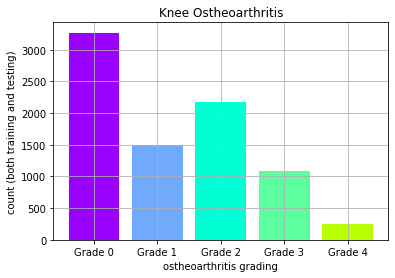

In [17]:
x = list(np.arange(5))
y = list(df['count (both training and testing)'])
plt.bar(x,y,color=['#9a01ff','#71a9fc','#01ffd5','#5cfe9d','#b7ff01'])
plt.grid()
plt.xticks(x,list(df['ostheoarthritis grading']))
plt.xlabel('ostheoarthritis grading')
plt.ylabel('count (both training and testing)')
plt.title('Knee Ostheoarthritis')
plt.show()

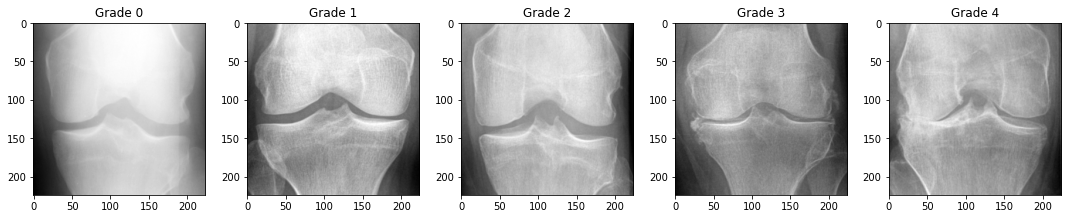

In [18]:
fig, ax = plt.subplots(1,5,figsize=(15,15))
ax = ax.ravel()
plt.tight_layout()
ax = ax.ravel()
plt.tight_layout()
ldata = ['/content/drive/My Drive/train/grade_0/9005656L.png',
         '/content/drive/My Drive/train/grade_1/9008561R.png',
        '/content/drive/My Drive/train/grade_2/9024940L.png',
        '/content/drive/My Drive/train/grade_3/9037823L.png',
        '/content/drive/My Drive/train/grade_4/9204055R.png']
lab = ['Grade 0','Grade 1','Grade 2','Grade 3','Grade 4']
for i in range(0,5):
    ax[i].imshow(plt.imread(ldata[i]), cmap='gray')
    ax[i].set_title(lab[i])
plt.show()

## Lets Perform Image Segmentation on training images using K-Means 


In [19]:
def segmentation(path):
    image = cv.imread(path,0)
    image = cv.GaussianBlur(image,(9,9),13,13)
    image = cv.resize(image,(64,64))
    pixelValues = image.reshape(-1,1)
    pixelValues = np.float32(pixelValues)
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(pixelValues)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    segmented_data  =  centers[labels.flatten()]
    return segmented_data

In [20]:
ltrain_paths = list(train_data['path'])
ltrain_labels = list(train_data['label'])
train_segments = []
for i in range(len(ltrain_paths)):
    l = []
    l.append(ltrain_labels[i])
    l.extend(segmentation(ltrain_paths[i]))
    train_segments.append(l)
#train_segments

#train_df = pd.DataFrame()


## Lets create the training data

In [21]:
cols = ['labels']
cols.extend(['f '+str(i+1) for i in range(4096)])
train_seg_data = pd.DataFrame(train_segments,columns=cols)

In [22]:
train_seg_data.head()

,labels,f 1,f 2,f 3,f 4,f 5,f 6,f 7,f 8,f 9,...,f 4087,f 4088,f 4089,f 4090,f 4091,f 4092,f 4093,f 4094,f 4095,f 4096
0,0,[120],[120],[120],[120],[185],[185],[185],[185],[185],...,[120],[120],[120],[120],[120],[120],[120],[120],[120],[120]
1,0,[131],[131],[200],[200],[200],[200],[200],[200],[200],...,[200],[200],[131],[131],[131],[131],[131],[131],[131],[131]
2,0,[76],[76],[76],[76],[76],[76],[113],[113],[113],...,[113],[113],[113],[113],[113],[76],[76],[76],[76],[76]
3,0,[72],[72],[72],[72],[72],[72],[119],[119],[119],...,[119],[119],[119],[119],[119],[119],[119],[119],[119],[119]
4,0,[88],[88],[88],[88],[123],[123],[123],[123],[123],...,[150],[150],[123],[123],[123],[123],[123],[123],[123],[123]


In [23]:
train_seg_data = train_seg_data.astype(int)
train_seg_data.head()

,labels,f 1,f 2,f 3,f 4,f 5,f 6,f 7,f 8,f 9,...,f 4087,f 4088,f 4089,f 4090,f 4091,f 4092,f 4093,f 4094,f 4095,f 4096
0,0,120,120,120,120,185,185,185,185,185,...,120,120,120,120,120,120,120,120,120,120
1,0,131,131,200,200,200,200,200,200,200,...,200,200,131,131,131,131,131,131,131,131
2,0,76,76,76,76,76,76,113,113,113,...,113,113,113,113,113,76,76,76,76,76
3,0,72,72,72,72,72,72,119,119,119,...,119,119,119,119,119,119,119,119,119,119
4,0,88,88,88,88,123,123,123,123,123,...,150,150,123,123,123,123,123,123,123,123


In [24]:
features = train_seg_data.iloc[:,1:].values
target = train_seg_data.iloc[:,0].values

## Lets work out for test images

In [25]:
ltest_paths = list(test_data['path'])
ltest_labels = list(test_data['label'])
test_segments = []
for i in range(len(ltest_paths)):
    l = []
    l.append(ltest_labels[i])
    l.extend(segmentation(ltest_paths[i]))
    test_segments.append(l)
test_seg_data = pd.DataFrame(test_segments,columns=cols)
test_seg_data = test_seg_data.astype(int)
test_seg_data.head()

,labels,f 1,f 2,f 3,f 4,f 5,f 6,f 7,f 8,f 9,...,f 4087,f 4088,f 4089,f 4090,f 4091,f 4092,f 4093,f 4094,f 4095,f 4096
0,0,77,77,139,139,139,139,139,139,139,...,139,139,139,139,77,77,77,77,77,77
1,0,143,143,143,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
2,0,63,63,63,63,63,138,138,138,138,...,138,138,138,138,138,138,138,138,138,63
3,0,115,115,154,154,154,154,154,154,154,...,115,115,115,115,115,115,115,115,115,115
4,0,84,84,84,84,84,84,148,148,148,...,84,84,84,84,84,84,84,84,84,84


In [26]:
t_features = test_seg_data.iloc[:,1:].values
t_target = test_seg_data.iloc[:,0].values

## Use Different Classifiers for Detection and Severity Prediction

### 1. K Nearest Neignbors Algorithm

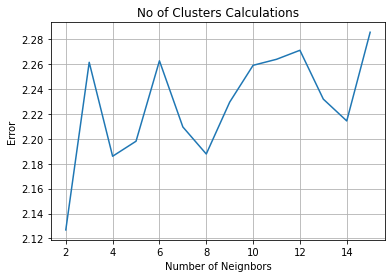

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
acc = []
for i in range(2,16):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(features,target)
  y_pred = model.predict(t_features)
  acc.append(mean_squared_error(t_target,y_pred))
plt.plot(range(2,16),acc)
plt.title('No of Clusters Calculations')
plt.xlabel('Number of Neignbors')
plt.ylabel('Error')
plt.grid()
plt.show()

In [28]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(features,target)
y_pred = model.predict(t_features)

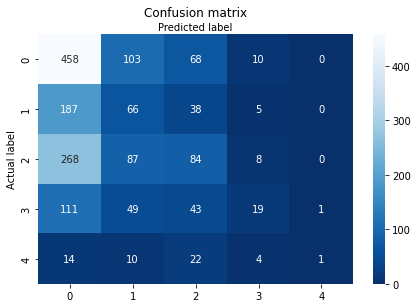

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cnf = confusion_matrix(t_target,y_pred)
class_names = ['malignant', 'benign']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')
plt.show()

In [30]:
print('Accuracy Score: ',accuracy_score(t_target,y_pred))

Accuracy Score:  0.37922705314009664


In [31]:
from sklearn.metrics import classification_report
print(classification_report(t_target,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.72      0.55       639
           1       0.21      0.22      0.22       296
           2       0.33      0.19      0.24       447
           3       0.41      0.09      0.14       223
           4       0.50      0.02      0.04        51

    accuracy                           0.38      1656
   macro avg       0.38      0.25      0.24      1656
weighted avg       0.37      0.38      0.33      1656



In [32]:
print('F1 Score (Macro): ',f1_score(t_target,y_pred,average='macro'))
print('F1 Score (Micro): ',f1_score(t_target,y_pred,average='micro'))
print('F1 Score (Weighted): ',f1_score(t_target,y_pred,average='weighted'))

F1 Score (Macro):  0.2361137570416782
F1 Score (Micro):  0.37922705314009664
F1 Score (Weighted):  0.3341659325498582


In [33]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC_Score (OVR):',roc_auc_score(t_target,model.predict_proba(t_features),multi_class='ovr'))
print('ROC-AUC_Score (OVO):',roc_auc_score(t_target,model.predict_proba(t_features),multi_class='ovo'))

ROC-AUC_Score (OVR): 0.563994904281526
ROC-AUC_Score (OVO): 0.5645221271212593


### 2. Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


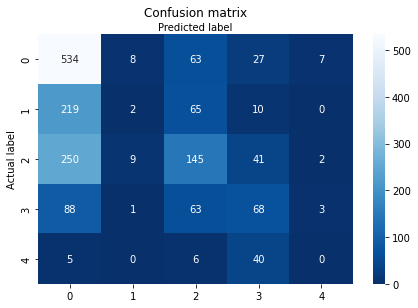

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(features,target)
y_pred = log_reg.predict(t_features)
cnf = confusion_matrix(t_target,y_pred)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')
plt.show()

In [35]:
print('Accuracy Score: ',accuracy_score(t_target,y_pred))
print('F1 Score (Macro): ',f1_score(t_target,y_pred,average='macro'))
print('F1 Score (Micro): ',f1_score(t_target,y_pred,average='micro'))
print('F1 Score (Weighted): ',f1_score(t_target,y_pred,average='weighted'))
print('ROC-AUC_Score (OVR):',roc_auc_score(t_target,log_reg.predict_proba(t_features),multi_class='ovr'))
print('ROC-AUC_Score (OVO):',roc_auc_score(t_target,log_reg.predict_proba(t_features),multi_class='ovo'))

Accuracy Score:  0.4522946859903382
F1 Score (Macro):  0.2656584781126635
F1 Score (Micro):  0.4522946859903382
F1 Score (Weighted):  0.3837796466490821
ROC-AUC_Score (OVR): 0.7029182837531798
ROC-AUC_Score (OVO): 0.7066284186006775


In [36]:
print(classification_report(t_target,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.84      0.62       639
           1       0.10      0.01      0.01       296
           2       0.42      0.32      0.37       447
           3       0.37      0.30      0.33       223
           4       0.00      0.00      0.00        51

    accuracy                           0.45      1656
   macro avg       0.28      0.29      0.27      1656
weighted avg       0.37      0.45      0.38      1656



### 3. Naive Bayes Classifier

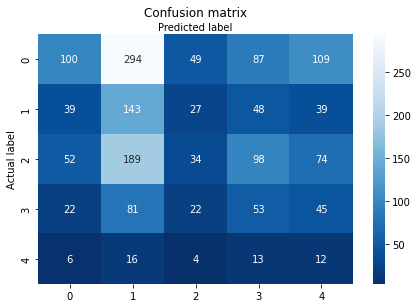

In [37]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features,target)
y_pred = clf.predict(t_features)
cnf = confusion_matrix(t_target,y_pred)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')
plt.show()

In [38]:
print('Accuracy Score: ',accuracy_score(t_target,y_pred))
print('F1 Score (Macro): ',f1_score(t_target,y_pred,average='macro'))
print('F1 Score (Micro): ',f1_score(t_target,y_pred,average='micro'))
print('F1 Score (Weighted): ',f1_score(t_target,y_pred,average='weighted'))
print('ROC-AUC_Score (OVR):',roc_auc_score(t_target,clf.predict_proba(t_features),multi_class='ovr'))
print('ROC-AUC_Score (OVO):',roc_auc_score(t_target,clf.predict_proba(t_features),multi_class='ovo'))

Accuracy Score:  0.20652173913043478
F1 Score (Macro):  0.1812396079464397
F1 Score (Micro):  0.20652173913043478
F1 Score (Weighted):  0.20118261655851058
ROC-AUC_Score (OVR): 0.5438055459577379
ROC-AUC_Score (OVO): 0.5485300396582309


In [39]:
print(classification_report(t_target,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.16      0.23       639
           1       0.20      0.48      0.28       296
           2       0.25      0.08      0.12       447
           3       0.18      0.24      0.20       223
           4       0.04      0.24      0.07        51

    accuracy                           0.21      1656
   macro avg       0.22      0.24      0.18      1656
weighted avg       0.30      0.21      0.20      1656



### 4. Support Vector Machines

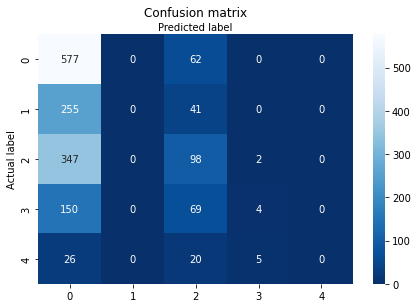

In [40]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf',C=1,probability=True)
svm_model.fit(features,target)
y_pred = svm_model.predict(t_features)
cnf = confusion_matrix(t_target,y_pred)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')
plt.show()

In [41]:
print('Accuracy Score: ',accuracy_score(t_target,y_pred))
print('F1 Score (Macro): ',f1_score(t_target,y_pred,average='macro'))
print('F1 Score (Micro): ',f1_score(t_target,y_pred,average='micro'))
print('F1 Score (Weighted): ',f1_score(t_target,y_pred,average='weighted'))
print('ROC-AUC_Score (OVR):',roc_auc_score(t_target,svm_model.predict_proba(t_features),multi_class='ovr'))
print('ROC-AUC_Score (OVO):',roc_auc_score(t_target,svm_model.predict_proba(t_features),multi_class='ovo'))

Accuracy Score:  0.41002415458937197
F1 Score (Macro):  0.17577345100511615
F1 Score (Micro):  0.41002415458937197
F1 Score (Weighted):  0.2997058547068137
ROC-AUC_Score (OVR): 0.704900835473617
ROC-AUC_Score (OVO): 0.719604865833459


In [42]:
print(classification_report(t_target,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.90      0.58       639
           1       0.00      0.00      0.00       296
           2       0.34      0.22      0.27       447
           3       0.36      0.02      0.03       223
           4       0.00      0.00      0.00        51

    accuracy                           0.41      1656
   macro avg       0.23      0.23      0.18      1656
weighted avg       0.30      0.41      0.30      1656



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  5. Decision Trees Classifier

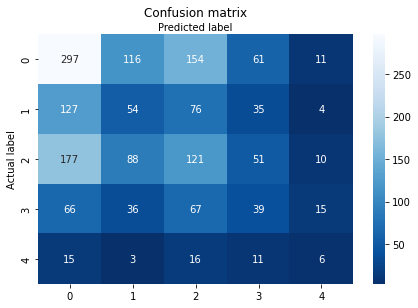

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(features,target)
y_pred = clf.predict(t_features)
cnf = confusion_matrix(t_target,y_pred)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')
plt.show()

In [44]:
print('Accuracy Score: ',accuracy_score(t_target,y_pred))
print('F1 Score (Macro): ',f1_score(t_target,y_pred,average='macro'))
print('F1 Score (Micro): ',f1_score(t_target,y_pred,average='micro'))
print('F1 Score (Weighted): ',f1_score(t_target,y_pred,average='weighted'))
print('ROC-AUC_Score (OVR):',roc_auc_score(t_target,clf.predict_proba(t_features),multi_class='ovr'))
print('ROC-AUC_Score (OVO):',roc_auc_score(t_target,clf.predict_proba(t_features),multi_class='ovo'))

Accuracy Score:  0.31219806763285024
F1 Score (Macro):  0.24317952376329885
F1 Score (Micro):  0.31219806763285024
F1 Score (Weighted):  0.3090279569582053
ROC-AUC_Score (OVR): 0.5259136788680167
ROC-AUC_Score (OVO): 0.5263062035414074


In [45]:
print(classification_report(t_target,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.46      0.45       639
           1       0.18      0.18      0.18       296
           2       0.28      0.27      0.27       447
           3       0.20      0.17      0.19       223
           4       0.13      0.12      0.12        51

    accuracy                           0.31      1656
   macro avg       0.24      0.24      0.24      1656
weighted avg       0.31      0.31      0.31      1656



### 6. Random Forests Classifier

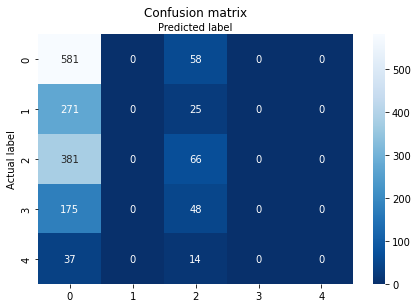

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3,random_state=0)
clf.fit(features,target)
y_pred = clf.predict(t_features)
cnf = confusion_matrix(t_target,y_pred)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')
plt.show()

In [47]:
print('Accuracy Score: ',accuracy_score(t_target,y_pred))
print('F1 Score (Macro): ',f1_score(t_target,y_pred,average='macro'))
print('F1 Score (Micro): ',f1_score(t_target,y_pred,average='micro'))
print('F1 Score (Weighted): ',f1_score(t_target,y_pred,average='weighted'))
print('ROC-AUC_Score (OVR):',roc_auc_score(t_target,clf.predict_proba(t_features),multi_class='ovr'))
print('ROC-AUC_Score (OVO):',roc_auc_score(t_target,clf.predict_proba(t_features),multi_class='ovo'))

Accuracy Score:  0.39070048309178745
F1 Score (Macro):  0.1516378953263831
F1 Score (Micro):  0.39070048309178745
F1 Score (Weighted):  0.2693033564266703
ROC-AUC_Score (OVR): 0.6175565875681259
ROC-AUC_Score (OVO): 0.6094830032805832


In [48]:
print(classification_report(t_target,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.91      0.56       639
           1       0.00      0.00      0.00       296
           2       0.31      0.15      0.20       447
           3       0.00      0.00      0.00       223
           4       0.00      0.00      0.00        51

    accuracy                           0.39      1656
   macro avg       0.14      0.21      0.15      1656
weighted avg       0.24      0.39      0.27      1656



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
